In [97]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier , plot_tree
from mlxtend.plotting import plot_decision_regions

In [98]:
df = pd.DataFrame()

In [99]:
df['x1'] = [1,2,3,4,5,6,6,7,9,9]
df['x2']= [5,3,6,8,1,9,5,8,9,2]
df['y'] = [1,1,0,1,0,1,0,1,0,0]

In [100]:
df

,x1,x2,y
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

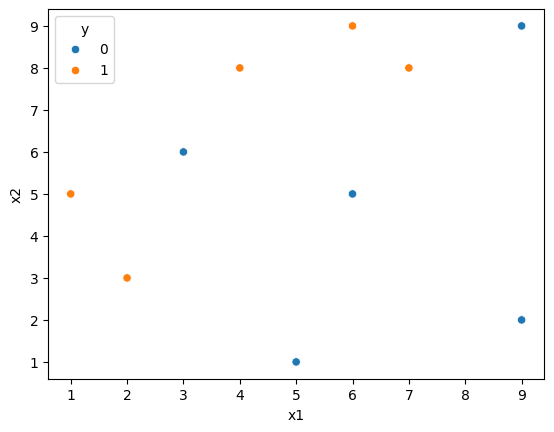

In [101]:
sns.scatterplot(x = df['x1'] ,y =  df['x2'] , hue = df['y'])

In [102]:
# initial weights
df['weights'] = 1 / df.shape[0]

In [103]:
df

,x1,x2,y,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [104]:
# decision stump
dt1 = DecisionTreeClassifier(max_depth = 1)

In [105]:
x = df.iloc[:,:2].values
y = df.iloc[:,-2].values

In [106]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

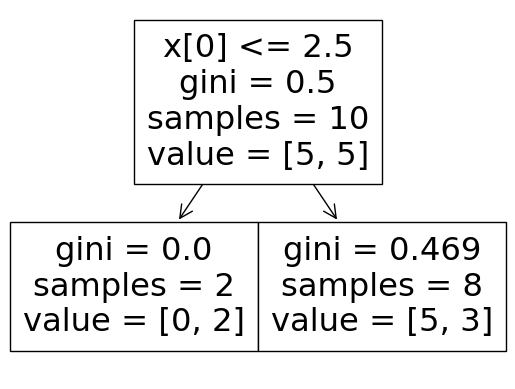

In [107]:
plot_tree(dt1)

<Axes: >

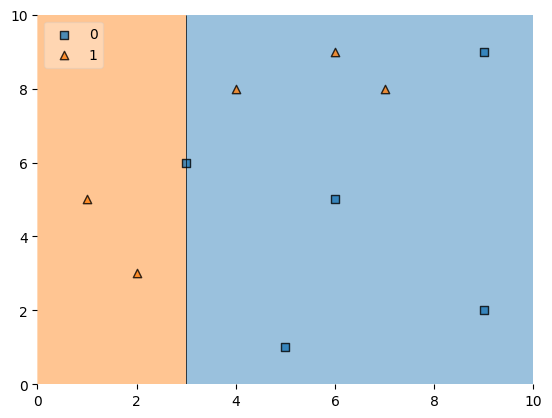

In [108]:
plot_decision_regions( x , y,clf = dt1 , legend = 2 )

In [109]:
df['y_pred'] = dt1.predict(x)

In [110]:
df

,x1,x2,y,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [111]:
# because 3 mistake / wrong predications here (addition of their weights)
error = 0.3

In [112]:
# model weight is equal to alpha

def calculate_model_weights (error):
  return (1/2) * np.log( (1 - error) / error)

alpha = (1/2 ) . log ( <sup> (1 - error) </sup> &frasl; <sub> error</sub> )

In [113]:
# calculating model weight for model 1 (dt1)

alpha1 = calculate_model_weights(error)
alpha1

0.42364893019360184

In [114]:
# update weights with new weights

def update_row_weights(row , alpha = 0.423):
  if row['y'] == row['y_pred'] :
    return row['weights'] * np.exp(-alpha)
  else :
    return row['weights'] * np.exp(alpha)

In [115]:
df['updated_weights'] = df.apply(update_row_weights , axis = 1)

In [116]:
df

,x1,x2,y,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [117]:
df['updated_weights'].sum()

0.9165153319682015

In [118]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [119]:
df

,x1,x2,y,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [120]:
df['normalized_weights'].sum()

1.0

In [121]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [122]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [123]:
df[['x1' , 'x2', 'y','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,y,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [124]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [125]:
index_values = create_new_dataset(df)
index_values

[4, 9, 2, 6, 5, 3, 0, 8, 9, 8]

In [126]:
second_df = df.iloc[index_values , [0,1,2,3]]

In [127]:
second_df

,x1,x2,y,weights
4,5,1,0,0.1
9,9,2,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
5,6,9,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1


In [128]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [129]:
x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [130]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 7.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

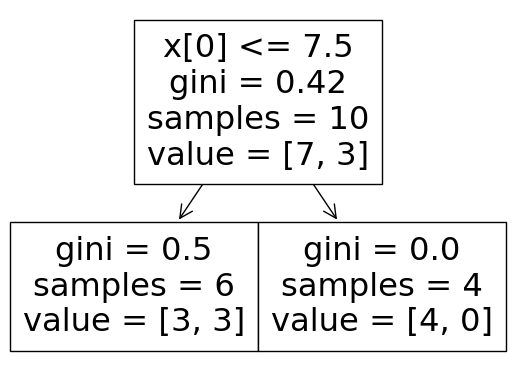

In [131]:
plot_tree(dt2)

<Axes: >

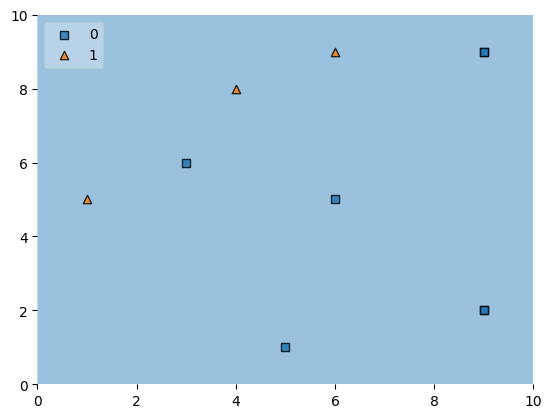

In [132]:
plot_decision_regions(x , y , clf = dt2 , legend = 2)

In [133]:
second_df['y_pred'] = dt2.predict(x)

In [134]:
second_df

,x1,x2,y,weights,y_pred
4,5,1,0,0.1,0
9,9,2,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
5,6,9,1,0.1,0
3,4,8,1,0.1,0
0,1,5,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0
8,9,9,0,0.1,0


In [135]:
alpha2 = calculate_model_weights( error = 0.3)
alpha2

0.42364893019360184

In [136]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['y'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [137]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [138]:
second_df

,x1,x2,y,weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508
2,3,6,0,0.1,0,0.065508
6,6,5,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
3,4,8,1,0.1,0,0.152653
0,1,5,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508
8,9,9,0,0.1,0,0.065508


In [139]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [140]:
second_df

,x1,x2,y,weights,y_pred,updated_weights,normalized_weights
4,5,1,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
6,6,5,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
3,4,8,1,0.1,0,0.152653,0.166559
0,1,5,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475
8,9,9,0,0.1,0,0.065508,0.071475


In [141]:
second_df['normalized_weights'].sum()

0.9999999999999998

In [142]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [143]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [144]:
second_df[['x1','x2','y','weights','y_pred','normalized_weights','cumsum_lower','cumsum_upper']]

,x1,x2,y,weights,y_pred,normalized_weights,cumsum_lower,cumsum_upper
4,5,1,0,0.1,0,0.071475,0.000000,0.071475
9,9,2,0,0.1,0,0.071475,0.071475,0.142950
2,3,6,0,0.1,0,0.071475,0.142950,0.214425
6,6,5,0,0.1,0,0.071475,0.214425,0.285900
5,6,9,1,0.1,0,0.166559,0.285900,0.452458
3,4,8,1,0.1,0,0.166559,0.452458,0.619017
0,1,5,1,0.1,0,0.166559,0.619017,0.785575
8,9,9,0,0.1,0,0.071475,0.785575,0.857050
9,9,2,0,0.1,0,0.071475,0.857050,0.928525
8,9,9,0,0.1,0,0.071475,0.928525,1.000000


In [145]:
index_values = create_new_dataset(second_df)

In [146]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [147]:
third_df

,x1,x2,y,weights
5,6,9,1,0.1
4,5,1,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1


In [148]:
dt3 = DecisionTreeClassifier(max_depth=1)

x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 7.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

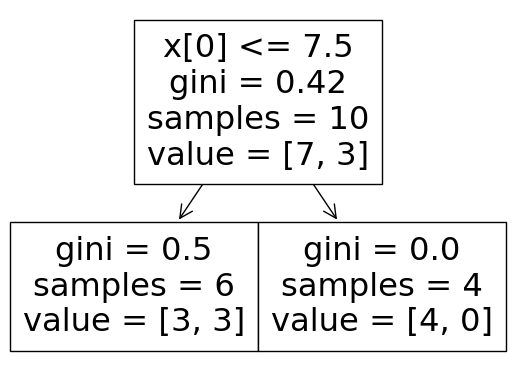

In [149]:
plot_tree(dt3)

<Axes: >

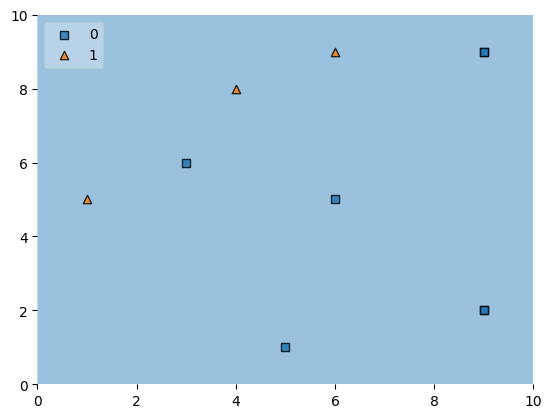

In [150]:
plot_decision_regions(x, y, clf=dt3, legend=2)

In [151]:
third_df['y_pred'] = dt3.predict(x)

In [152]:
third_df

,x1,x2,y,weights,y_pred
5,6,9,1,0.1,0
4,5,1,0,0.1,0
8,9,9,0,0.1,0
3,4,8,1,0.1,0
3,4,8,1,0.1,0
0,1,5,1,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0


In [153]:
alpha3 = calculate_model_weights(0.5)
alpha3

0.0

# Prediction

for [1,5] answer will be 1

In [154]:
query = np.array([1,5]).reshape(1,2)

In [155]:
dt1.predict(query)

array([1])

In [156]:
dt2.predict(query)

array([0])

In [157]:
dt3.predict(query)

array([0])

In [158]:
alpha1*1 + alpha2*(1) + alpha3*(1)

0.8472978603872037

In [159]:
np.sign(alpha1*1 + alpha2*(1) + alpha3*(1))

1.0

Means Yes / 1

For [9,9] answer will be 0

In [160]:
query = np.array([9,9]).reshape(1,2)

In [161]:
dt1.predict(query)

array([0])

In [162]:
dt2.predict(query)

array([0])

In [163]:
dt3.predict(query)

array([0])

Answer will be 0 according to majority count

In [164]:
print(alpha1 , alpha2 ,alpha3)

0.42364893019360184 0.42364893019360184 0.0


In [165]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

0.0

In [166]:
np.sign(alpha1*(1) + alpha2*(-1) + alpha3*(-1))

0.0

pata nahi kaise ye Zero ho gaya h par esko -1 hona tha tab ye 0 output deta